In [1]:
#!/usr/bin/env python3
from cluster.api.cluster_api import ClusteringAPI

In [2]:
# Define HTTP parser configuration
class CustomConfiguration:
    HTTP_PARSER_CONFIG: dict = {
        "process_cookie": True,
        "process_trash_headers": True,
        "remove_digits": True,
        "remove_special": True
    }

In [3]:
# Initialize clustering API
hosts_cluster = ClusteringAPI(
    default_range=(1, 10),
    http_parser_config=CustomConfiguration.HTTP_PARSER_CONFIG
)

In [4]:
# Create cluster, prepare matrix and other data
hosts_cluster.prepare_clusters(input_file="data/hosts_aisec.json")

Calculate results for 1 clusters
Calculate results for 2 clusters
Calculate results for 3 clusters
Calculate results for 4 clusters
Calculate results for 5 clusters
Calculate results for 6 clusters
Calculate results for 7 clusters
Calculate results for 8 clusters
Calculate results for 9 clusters


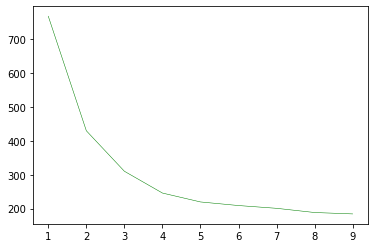

In [5]:
# Create plots with the Elbow method to visualize possible clusters
hosts_cluster.create_plot()

In [6]:
# Calculate Silhouette score and determine the best K number
hosts_cluster.calculate_silhouette_score()

Current cluster: 2, silhouette score: 0.7153906264306064 (current best K: 2)
Current cluster: 3, silhouette score: 0.8056208251828991 (current best K: 3)
Current cluster: 4, silhouette score: 0.8384322880050202 (current best K: 4)
Current cluster: 5, silhouette score: 0.8232291328660564 (current best K: 4)
Current cluster: 6, silhouette score: 0.8266280421416572 (current best K: 4)
Current cluster: 7, silhouette score: 0.8306727940051093 (current best K: 4)
Current cluster: 8, silhouette score: 0.829706251013551 (current best K: 4)
Current cluster: 9, silhouette score: 0.8377456423351488 (current best K: 4)
The best K number is: 4


In [7]:
# Calculate final clusters
hosts_cluster.calculate_clusters()
predictions_per_index = hosts_cluster.predict_clusters()

Current cluster: 0
['envoy', 'upstream', 'service', 'time', 'express', 'powered', 'istio', 'randomvaluelastmodified', 'etag', 'public', 'modified', 'randomvalueetag', 'age', 'max', 'content', 'server', 'utf', 'charset', 'accept', 'bytes']
Current cluster: 1
['kbn', 'cache', 'content', 'accept', 'version', 'kibana', 'vary', 'encoding', 'alive', 'ranges', 'bytes', 'randomvaluecontentlength', 'control', 'ok', 'type', 'date', 'text', 'randomvaluedate', 'charset', 'utf']
Current cluster: 2
['kbn', 'xpack', 'sig', 'cache', 'content', 'accept', 'undefined', 'encoding', 'vary', 'kibana', 'alive', 'bytes', 'ranges', 'charset', 'utf', 'control', 'type', 'randomvaluedate', 'date', 'text']
Current cluster: 3
['randomvalueexpires', 'expires', 'gunicorn', 'close', 'randomvalueetag', 'etag', 'randomvaluelastmodified', 'modified', 'public', 'age', 'max', 'content', 'server', 'charset', 'utf', 'control', 'cache', 'randomvaluecontentlength', 'ok', 'type']


In [8]:
# Show some examples from clusters
hosts_cluster.show_example_clusters()
hosts_cluster.show_example_samples()

 ---
Examples from clusters directly
 --- 
Cluster [0]:
http.title:"Kubeflow Central Dashboard" [0] 	 - 	 'HTTP/1.1 200 OK\r\nDate: Thu, 19 Mar 2020 15:56:42 GMT\r\nContent-Type: text/html; charset=UTF-8\r\nContent-Length: 1433\r\nConnection: keep-alive\r\nx-powered-by: Express\r\naccept-ranges: bytes\r\ncache-control: public, max-age=0\r\nlast-modified: Wed, 30 Oct 2019 11:53:57 GMT\r\netag: W/"599-16e1c83e808"\r\nx-envoy-upstream-service-time: 0\r\nserver: istio-envoy\r\n\r\n'
http.title:"Kubeflow Central Dashboard" [0] 	 - 	 'HTTP/1.1 200 OK\r\nDate: Wed, 18 Mar 2020 10:11:05 GMT\r\nContent-Type: text/html; charset=UTF-8\r\nContent-Length: 1433\r\nConnection: keep-alive\r\nx-powered-by: Express\r\naccept-ranges: bytes\r\ncache-control: public, max-age=0\r\nlast-modified: Wed, 30 Oct 2019 11:53:57 GMT\r\netag: W/"599-16e1c83e808"\r\nx-envoy-upstream-service-time: 0\r\nserver: istio-envoy\r\n\r\n'
http.title:"Kubeflow Central Dashboard" [0] 	 - 	 'HTTP/1.1 200 OK\r\nDate: Thu, 19 Mar 

In [9]:
# Save data per clusters
hosts_cluster.save_clusters_results()